## **Explore Denver Neighborhoods for Rental Property Investments**

#### **Content**
- <a href='#item1'>Part I: Analyze Demographics and Rental Economics </a>
- <a href='#item2'>Part II: Analyze Neighborhood Crime Rates </a>
- <a href='#item3'>Part III: Analyze Home Value Growth </a>
- <a href='#item4'>Part IV: Analyze Access to Popular Venues </a>

***

<a id='item1'></a>

#### Part I: Analyze Demographics and Rental Economics

In [1]:
import warnings
import pandas as pd
import numpy as np
!pip install scikit-learn==0.21.3
import scipy
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

In [2]:
den_acs=pd.read_csv('https://www.denvergov.org/media/gis/DataCatalog/american_community_survey_nbrhd_2011_2015/csv/american_community_survey_nbrhd_2011_2015.csv')
den_acs.head()

,NBHD_NAME,TTL_POPULATION_ALL,HISPANIC_OR_LATINO,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,HAWAIIAN_PI,OTHER_RACE,TWO_OR_MORE,...,WESTERN_AFRICA_FB,OCEANIA_FB,AMERICAS_FB,LATIN_AMERICA_FB,CARRIBEAN_FB,CENTRAL_AMERICA_FB,SOUTH_AMERICA_FB,NORTH_AMERICA_FB,PCT_POVERTY,PCT_FAM_POVERTY
0,Chaffee Park,4045.0,2343.0,1506.0,59.0,0.0,29.0,0.0,0.0,108.0,...,0.0,0.0,729.0,729.0,0.0,697.0,32.0,0.0,10.30,9.00
1,Sunnyside,9832.0,4910.0,4225.0,276.0,172.0,129.0,28.0,2.0,90.0,...,10.0,0.0,901.0,901.0,7.0,873.0,21.0,0.0,20.60,17.63
2,Highland,8991.0,2444.0,5890.0,331.0,29.0,213.0,0.0,0.0,84.0,...,0.0,8.0,690.0,650.0,0.0,606.0,44.0,40.0,14.95,12.80
3,Globeville,3551.0,2178.0,1159.0,116.0,12.0,0.0,15.0,6.0,65.0,...,0.0,21.0,705.0,705.0,13.0,680.0,12.0,0.0,34.60,25.30
4,Jefferson Park,2827.0,1454.0,1114.0,138.0,51.0,35.0,0.0,0.0,35.0,...,9.0,0.0,884.0,884.0,0.0,879.0,5.0,0.0,27.60,24.20


In [3]:
np.asarray(den_acs.columns)

array(['NBHD_NAME', 'TTL_POPULATION_ALL', 'HISPANIC_OR_LATINO', 'WHITE',
       'BLACK', 'NATIVE_AMERICAN', 'ASIAN', 'HAWAIIAN_PI', 'OTHER_RACE',
       'TWO_OR_MORE', 'PCT_HISPANIC', 'PCT_WHITE', 'PCT_BLACK',
       'PCT_NATIVEAM', 'PCT_ASIAN', 'PCT_HAWAIIANPI', 'PCT_OTHERRACE',
       'PCT_TWOORMORE_RACES', 'MALE', 'FEMALE', 'AGE_LESS_5',
       'AGE_5_TO_9', 'AGE_10_TO_14', 'AGE_15_TO_17', 'AGE_0_TO_9',
       'AGE_10_TO_19', 'AGE_20_TO_29', 'AGE_30_TO_39', 'AGE_40_TO_49',
       'AGE_50_TO_59', 'AGE_60_TO_69', 'AGE_70_TO_79', 'AGE_80_PLUS',
       'AGELESS18', 'AGE65PLUS', 'PCT_AGELESS18', 'PCT_AGE65PLUS',
       'MEDIAN_AGE_ALL', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEMALE',
       'TTL_AGE_3_PLUS_ENRSTATUS', 'ENROLLED_IN_SCHOOL',
       'NURSERY_OR_PRESCHOOL', 'KINDERGARTEN', 'GRADES_5_TO_8',
       'GRADES_9_TO_12', 'COLLEGE_UNDERGRADUATE', 'GRADUATE_SCHOOL',
       'NOT_ENROLLED', 'TOTAL_COMMUTERS', 'COMMUTE_LESS_15',
       'COMMUTE_15_TO_30', 'COMMUTE_30_TO_45', 'COMMUTE_45_TO_60',

In [4]:
# Select demographic metrics for analysis. Calculate ratios. Prepare the dataframe
neigh_demo=den_acs[['NBHD_NAME','TTL_POPULATION_ALL','MEDIAN_AGE_ALL','LESS_THAN_HS_DIPLOMA_EDU', 'HSGRAD_OR_EQUIV_EDU', 'SOMECOLLEGE_OR_AA_EDU', 'BACHELORS_OR_HIGHER_EDU',\
                  'MED_HH_INCOME','PER_CAPITA_INCOME','PCT_POVERTY']]
warnings.filterwarnings('ignore')
neigh_demo['TTL_EDU']=neigh_demo[['LESS_THAN_HS_DIPLOMA_EDU','HSGRAD_OR_EQUIV_EDU','SOMECOLLEGE_OR_AA_EDU','BACHELORS_OR_HIGHER_EDU']].sum(axis=1)
neigh_demo['PCT_LESS_THAN_HS_DIPLOMA']=neigh_demo['LESS_THAN_HS_DIPLOMA_EDU']/neigh_demo['TTL_EDU']*100
neigh_demo['PCT_HSGRAD_OR_EQUIV']=neigh_demo['HSGRAD_OR_EQUIV_EDU']/neigh_demo['TTL_EDU']*100
neigh_demo['PCT_SOMECOLLEGE_OR_AA']=neigh_demo['SOMECOLLEGE_OR_AA_EDU']/neigh_demo['TTL_EDU']*100
neigh_demo['PCT_BACHELORS_OR_HIGHER']=neigh_demo['BACHELORS_OR_HIGHER_EDU']/neigh_demo['TTL_EDU']*100
warnings.filterwarnings('default')

neigh_demo=neigh_demo[['NBHD_NAME','TTL_POPULATION_ALL','MEDIAN_AGE_ALL','MED_HH_INCOME','PER_CAPITA_INCOME','PCT_POVERTY',\
                       'PCT_LESS_THAN_HS_DIPLOMA','PCT_HSGRAD_OR_EQUIV','PCT_SOMECOLLEGE_OR_AA','PCT_BACHELORS_OR_HIGHER']]
neigh_demo.rename(columns={'NBHD_NAME':'NBHD','TTL_POPULATION_ALL':'TTL_POPULATION','MEDIAN_AGE_ALL':'MEDIAN_AGE'},inplace=True)
neigh_demo.set_index('NBHD',inplace=True)
neigh_demo.describe()

,TTL_POPULATION,MEDIAN_AGE,MED_HH_INCOME,PER_CAPITA_INCOME,PCT_POVERTY,PCT_LESS_THAN_HS_DIPLOMA,PCT_HSGRAD_OR_EQUIV,PCT_SOMECOLLEGE_OR_AA,PCT_BACHELORS_OR_HIGHER
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,8328.897436,34.958846,59767.287564,27172.535641,17.878077,14.419550,17.145852,22.823217,45.611381
std,5909.150409,5.671120,25415.886865,17156.381371,12.344167,13.984654,9.061600,6.356085,23.035131
min,825.000000,17.600000,9849.000000,0.000000,2.800000,0.000000,4.066781,8.946918,4.681648
25%,4602.500000,31.500000,42593.625000,15543.175000,8.937500,3.336673,8.592255,18.281512,25.272311
50%,7196.500000,34.465000,54718.000000,25205.400000,15.375000,8.980771,15.901114,22.471906,49.554859
75%,9722.250000,38.700000,69478.417500,37001.385000,24.417500,23.684982,25.793530,27.599444,66.710577
max,34957.000000,49.000000,134167.000000,73861.550000,86.500000,51.498127,36.753355,44.327177,86.130137


In [5]:
# Select metrics to analyze rental economics. Calculate ratios. Prepare the dataframe.
neigh_re=den_acs[['NBHD_NAME','MED_YR_STRUCTURE_BUILT','MEDIAN_HOME_VALUE','MED_CONTRACT_RENT','TTL_HOUSING_UNITS','OCCUPIED_HU','VACANT_HU','OWNER_OCCUPIED_HU','RENTER_OCCUPIED_HU']]
warnings.filterwarnings('ignore')
neigh_re['RENT_VALUE_RATIO']=neigh_re['MED_CONTRACT_RENT']*12/neigh_re['MEDIAN_HOME_VALUE']*100
neigh_re['VACANCY']=neigh_re['VACANT_HU']/neigh_re['TTL_HOUSING_UNITS']*100
neigh_re['PCT_RENTAL']=neigh_re['RENTER_OCCUPIED_HU']/neigh_re['TTL_HOUSING_UNITS']*100
warnings.filterwarnings('default')
neigh_re=neigh_re[['NBHD_NAME','MED_YR_STRUCTURE_BUILT','MEDIAN_HOME_VALUE','MED_CONTRACT_RENT','RENT_VALUE_RATIO','TTL_HOUSING_UNITS','VACANCY','PCT_RENTAL']]
neigh_re.rename(columns={'NBHD_NAME':'NBHD'},inplace=True)
neigh_re.set_index('NBHD',inplace=True)
neigh_re.describe()

,MED_YR_STRUCTURE_BUILT,MEDIAN_HOME_VALUE,MED_CONTRACT_RENT,RENT_VALUE_RATIO,TTL_HOUSING_UNITS,VACANCY,PCT_RENTAL
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,1747.628077,303488.034103,962.938077,inf,3535.833333,7.090469,50.107623
std,603.815697,151329.497509,269.609444,NaN,2224.292249,4.865881,18.904421
min,0.000000,0.000000,218.000000,1.833017,59.000000,0.971323,12.418773
25%,1950.250000,191450.000000,805.002500,3.106928,1875.750000,4.081456,35.153559
50%,1958.500000,279658.335000,880.875000,3.848924,3161.000000,6.432474,51.652059
75%,1973.875000,363004.167500,1078.875000,5.105415,4159.750000,9.066444,63.850755
max,2006.500000,824500.000000,1720.000000,inf,10717.000000,36.392786,100.000000


\
Analyze neighborhood clustering using the OPTICS model.

In [6]:
# Run OPTICS clustering on demographic data
neigh_demo['LABEL']=-1
cols=neigh_demo.columns.tolist()
neigh_demo=neigh_demo[cols[-1:]+cols[:-1]]

cluster_param=['TTL_POPULATION','PCT_POVERTY','PCT_LESS_THAN_HS_DIPLOMA']
demo_clust=neigh_demo[cluster_param]
demo_clust=StandardScaler().fit_transform(demo_clust)

demo_optics=OPTICS(min_samples=4).fit(demo_clust)
labels=demo_optics.labels_
neigh_demo['LABEL']=labels

neigh_demo.groupby('LABEL').count()

,TTL_POPULATION,MEDIAN_AGE,MED_HH_INCOME,PER_CAPITA_INCOME,PCT_POVERTY,PCT_LESS_THAN_HS_DIPLOMA,PCT_HSGRAD_OR_EQUIV,PCT_SOMECOLLEGE_OR_AA,PCT_BACHELORS_OR_HIGHER
LABEL,,,,,,,,,
-1,43,43,43,43,43,43,43,43,43
0,5,5,5,5,5,5,5,5,5
1,12,12,12,12,12,12,12,12,12
2,4,4,4,4,4,4,4,4,4
3,5,5,5,5,5,5,5,5,5
4,9,9,9,9,9,9,9,9,9


In [7]:
# Run OPTICS clustering on rental economics data
neigh_re['LABEL']=-1
cols=neigh_re.columns.tolist()
neigh_re=neigh_re[cols[-1:]+cols[:-1]]

neigh_re.replace([np.inf,-np.inf],np.nan,inplace=True)
neigh_re.dropna(axis=0,inplace=True)

cluster_param=['MED_YR_STRUCTURE_BUILT','RENT_VALUE_RATIO','VACANCY','PCT_RENTAL']

re_clust=neigh_re[cluster_param]
re_clust=StandardScaler().fit_transform(re_clust)
re_optics=OPTICS(min_samples=4).fit(re_clust)
labels=re_optics.labels_
neigh_re['LABEL']=labels

neigh_re.groupby('LABEL').count()

,MED_YR_STRUCTURE_BUILT,MEDIAN_HOME_VALUE,MED_CONTRACT_RENT,RENT_VALUE_RATIO,TTL_HOUSING_UNITS,VACANCY,PCT_RENTAL
LABEL,,,,,,,
-1,28,28,28,28,28,28,28
0,4,4,4,4,4,4,4
1,6,6,6,6,6,6,6
2,11,11,11,11,11,11,11
3,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4
5,6,6,6,6,6,6,6
6,6,6,6,6,6,6,6
7,8,8,8,8,8,8,8


Neither of the two clustering model generated acceptable results. Seek alternative approach.

In [8]:
#Filter neighborhoods using demographic metrics thresholds (above medium)
demo_stats=pd.DataFrame(neigh_demo.describe())
HH_Income=demo_stats.loc['50%','MED_HH_INCOME']
Poverty=demo_stats.loc['50%','PCT_POVERTY']
Education=demo_stats.loc['50%','PCT_LESS_THAN_HS_DIPLOMA']
demo_sel=neigh_demo[(neigh_demo['MED_HH_INCOME']>=HH_Income) & (neigh_demo['PCT_POVERTY']<=Poverty) & (neigh_demo['PCT_LESS_THAN_HS_DIPLOMA']<=Education)]
demo_sel
neigh=demo_sel.index.tolist()
demo_sel.index

Index(['Wellshire', 'Rosedale', 'Cheesman Park', 'Hilltop', 'Montclair',
       'Hale', 'South Park Hill', 'Virginia Village', 'Auraria', 'Platt Park',
       'Southmoor Park', 'Hampden South', 'Cory - Merrill', 'Belcaro',
       'Washington Park', 'Washington Park West', 'Cherry Creek',
       'Country Club', 'Congress Park', 'City Park', 'Civic Center',
       'Stapleton', 'Lowry Field', 'West Highland', 'Berkeley', 'Regis',
       'Marston', 'Indian Creek'],
      dtype='object', name='NBHD')

28 neighborhoods passed the demographic metrics thresholds.

In [9]:
#Filter neighborhoods using rental metrics thresholds (above medium)
re_stats=pd.DataFrame(neigh_re.describe())
Rent_value_ratio=re_stats.loc['50%','RENT_VALUE_RATIO']
Vacancy=re_stats.loc['50%','VACANCY']
re_sel=neigh_re[(neigh_re['RENT_VALUE_RATIO']>=Rent_value_ratio) & (neigh_re['VACANCY']<=Vacancy)]
re_sel.index

Index(['Chaffee Park', 'Athmar Park', 'Northeast Park Hill',
       'University Hills', 'Harvey Park', 'Mar Lee', 'Westwood',
       'College View - South Platte', 'Overland', 'Ruby Hill', 'Bear Valley',
       'Harvey Park South', 'Hampden South', 'Cory - Merrill', 'Stapleton',
       'Montbello', 'Regis', 'Skyland', 'Barnum',
       'Gateway - Green Valley Ranch', 'Indian Creek'],
      dtype='object', name='NBHD')

21 neighborhoods passed the rental metrics thresholds.

5 neighborhoods passed both criteria. Neighborhood metrics summarized as below.

In [10]:
#Filter neighborhoods that passed both demographic metrics thresholds and rental metrics thresholds.
neigh_sel=re_sel[re_sel.index.isin(neigh)]
pd.DataFrame(neigh_sel.index)
neigh_sel=pd.concat([demo_sel[demo_sel.index.isin(neigh_sel.index)],neigh_sel],axis=1)
neigh_sel=neigh_sel[['RENT_VALUE_RATIO','VACANCY','MED_HH_INCOME','PCT_POVERTY','PCT_LESS_THAN_HS_DIPLOMA']]
neigh_sel

,RENT_VALUE_RATIO,VACANCY,MED_HH_INCOME,PCT_POVERTY,PCT_LESS_THAN_HS_DIPLOMA
NBHD,,,,,
Hampden South,4.129653,6.421894,67354.67,5.10,3.780702
Cory - Merrill,4.536792,2.587601,94583.00,7.40,2.458034
Stapleton,4.232819,4.135664,117256.00,4.05,8.368132
Regis,4.298282,2.207235,56691.00,13.50,7.661437
Indian Creek,6.221172,4.489164,56940.00,7.40,4.026380


<a id='item2'></a>

#### Part II: Analyze Neighborhood Crime Rates

In [11]:
!conda install lxml -q --yes
import lxml

!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-1       --> 2019.6.16-hecc5488_0 conda-forge
    certifi:         2019.6.16-py36_1  --> 2019.6.16-py36_1     conda-forge

The following packages will be DOWNGRADED:

    openssl:         1.1.1c-h7b6447c_1 --> 1.1.1c-h516909a_0    conda-forge


certifi-2019.6.16    | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


/opt/conda/envs/Python36/lib/python3.6/site-packages/pkg_resources/__init__.py:1151: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  self, resource_name
/opt/conda/envs/Python36/lib/python3.6/site-packages/branca/colormap.py:29: ResourceWarning: unclosed file <_io.BufferedReader name='/opt/conda/envs/Python36/lib/python3.6/site-packages/branca/_cnames.json'>
  resource_package, resource_path_cnames).read().decode()
/opt/conda/envs/Python36/lib/python3.6/site-packages/branca/colormap.py:33: ResourceWarning: unclosed file <_io.BufferedReader name='/opt/conda/envs/Python36/lib/python3.6/site-packages/branca/_schemes.json'>
  resource_package, resource_path_schemes).read().decode()


In [12]:
dfs=pd.read_html('https://crime.denverpost.com/neighborhood/compare/')
crime_property=dfs[0]
crime_violence=dfs[1]

In [13]:
crime_property['Total']=crime_property.sum(axis=1)

neigh_demo.reset_index(inplace=True)
neigh_ppl=neigh_demo[['NBHD','TTL_POPULATION']]
neigh_ppl.columns=['Neighborhood','TTL_POPULATION']
crime_property=pd.merge(crime_property,neigh_ppl,on='Neighborhood')
crime_property['Crimes per 1k People']=crime_property['Total']/crime_property['TTL_POPULATION']*1000
crime_property

,Neighborhood,Property crime,Residential burglary,Business burglary,"Burglary, by force","Burglary, unforced entry",Auto theft,Arson,Total,TTL_POPULATION,Crimes per 1k People
0,Athmar Park,56,74,32,37,77,34,61,371,8659.0,42.845594
1,Auraria,3,78,1,2,1,2,2,89,825.0,107.878788
2,Baker,12,26,25,28,27,19,4,141,5799.0,24.314537
3,Barnum,58,42,51,31,65,42,21,310,6593.0,47.019566
4,Barnum West,76,69,69,59,75,44,6,398,5860.0,67.918089
5,Bear Valley,74,54,66,64,61,65,54,438,9246.0,47.371836
6,Belcaro,34,33,18,12,56,70,66,289,4728.0,61.125212
7,Berkeley,42,19,63,30,45,54,56,309,8564.0,36.081270
8,Capitol Hill,20,14,33,26,22,28,15,158,15704.0,10.061131
9,CBD,2,75,5,24,16,6,3,131,4049.0,32.353668


In [14]:
crime_violence['Total']=crime_violence.sum(axis=1)

crime_violence=pd.merge(crime_violence,neigh_ppl,on='Neighborhood')
crime_violence['Crimes per 1k People']=crime_violence['Total']/crime_violence['TTL_POPULATION']*1000
crime_violence

,Neighborhood,Violent crime,Domestic violence,Sexual assault,Robbery,DUI,Hit and run,Total,TTL_POPULATION,Crimes per 1k People
0,Athmar Park,33,36,35,29,30,24,187,8659.0,21.596027
1,Auraria,3,2,4,1,2,1,13,825.0,15.757576
2,Baker,17,33,23,12,5,5,95,5799.0,16.382135
3,Barnum,23,17,29,21,73,36,199,6593.0,30.183528
4,Barnum West,53,62,60,66,26,65,332,5860.0,56.655290
5,Bear Valley,47,28,62,53,76,70,336,9246.0,36.340039
6,Belcaro,69,72,54,47,47,42,331,4728.0,70.008460
7,Berkeley,49,54,51,28,56,47,285,8564.0,33.278842
8,Capitol Hill,15,11,14,15,31,23,109,15704.0,6.940907
9,CBD,2,4,7,3,23,4,43,4049.0,10.619906


In [15]:
# Change the neighborhood name of 'Cory - Merrill' to be consistent
crime_property[crime_property['Neighborhood']=='Cory-Merrill'].index
crime_property.iloc[20,0]='Cory - Merrill'
crime_violence[crime_violence['Neighborhood']=='Cory-Merrill'].index
crime_violence.iloc[20,0]='Cory - Merrill'

In [16]:
#Coordinates of selected neighborhoods
neigh_coord=[['Hampden South',39.6434,-104.8940],['Cory - Merrill',39.6893,-104.9501],['Stapleton',39.7603,-104.8908],\
             ['Regis',39.7874,-105.0439],['Indian Creek',39.6858,-104.8965]]

neigh_coord=pd.DataFrame(neigh_coord)
neigh_coord.columns=['Neighborhood','Lat','Long']
neigh_coord.to_csv('neigh_coord.csv',index=False)
neigh_coord

,Neighborhood,Lat,Long
0,Hampden South,39.6434,-104.8940
1,Cory - Merrill,39.6893,-104.9501
2,Stapleton,39.7603,-104.8908
3,Regis,39.7874,-105.0439
4,Indian Creek,39.6858,-104.8965


In [17]:
#Summarize crime data of the 5 selected neighborhoods
neigh_crime=crime_property[crime_property['Neighborhood'].isin(neigh_coord['Neighborhood'])]
neigh_crime=neigh_crime[['Neighborhood','Crimes per 1k People']]
neigh_coord=pd.merge(neigh_coord,neigh_crime,on='Neighborhood')
neigh_coord.columns=['Neighborhood','Lat','Long','Property Crimes per 1k People']

neigh_crime=crime_violence[crime_violence['Neighborhood'].isin(neigh_coord['Neighborhood'])]
neigh_crime=neigh_crime[['Neighborhood','Crimes per 1k People']]
neigh_coord=pd.merge(neigh_coord,neigh_crime,on='Neighborhood')
neigh_coord.columns=['Neighborhood','Lat','Long','Property Crimes per 1k People','Violence Crimes per 1k People']
neigh_coord

,Neighborhood,Lat,Long,Property Crimes per 1k People,Violence Crimes per 1k People
0,Hampden South,39.6434,-104.8940,25.609920,19.342229
1,Cory - Merrill,39.6893,-104.9501,47.928513,36.555646
2,Stapleton,39.7603,-104.8908,10.552593,7.375468
3,Regis,39.7874,-105.0439,54.291133,54.765292
4,Indian Creek,39.6858,-104.8965,147.494305,108.485194


Mapping crimes of neighborhoods using a Choropleth Map

In [18]:
!wget https://github.com/blackmad/neighborhoods/raw/master/denver.geojson
    
den_geo=r'denver.geojson'
lat=39.7392
long=-104.9903

--2019-09-05 22:58:22--  https://github.com/blackmad/neighborhoods/raw/master/denver.geojson
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/blackmad/neighborhoods/master/denver.geojson [following]
--2019-09-05 22:58:22--  https://raw.githubusercontent.com/blackmad/neighborhoods/master/denver.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274394 (268K) [text/plain]
Saving to: ‘denver.geojson.1’

100%[======================================>] 274,394     --.-K/s   in 0.02s   

2019-09-05 22:58:22 (10.7 MB/s) - ‘denver.geojson.1’ saved [274394/274394]



In [19]:
#choropleth map for property crime
den_map=folium.Map(location=[lat,long],zoom_start=11)
den_map.choropleth(
    geo_data=den_geo,
    data=crime_property,
    columns=['Neighborhood', 'Crimes per 1k People'],
    key_on='feature.properties.name',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Denver Property Crimes (per 1k People)'
)

for i in range(len(neigh_coord)):
    d_format='{0:.2f}'.format(neigh_coord.iloc[i,3])
    pop_label=neigh_coord.iloc[i,0]+': '+d_format
    folium.Marker(location=neigh_coord.iloc[i,1:3],popup=pop_label).add_to(den_map)

den_map

/opt/conda/envs/Python36/lib/python3.6/site-packages/pkg_resources/__init__.py:1151: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  self, resource_name
/opt/conda/envs/Python36/lib/python3.6/site-packages/branca/utilities.py:137: ResourceWarning: unclosed file <_io.BufferedReader name='/opt/conda/envs/Python36/lib/python3.6/site-packages/branca/_schemes.json'>
  resource_package, resource_path_schemes).read().decode()
/opt/conda/envs/Python36/lib/python3.6/site-packages/branca/utilities.py:141: ResourceWarning: unclosed file <_io.BufferedReader name='/opt/conda/envs/Python36/lib/python3.6/site-packages/branca/_cnames.json'>
  resource_package, resource_path_scheme_info).read().decode()
/opt/conda/envs/Python36/lib/python3.6/site-packages/branca/utilities.py:145: ResourceWarning: unclosed file <_io.BufferedReader name='/opt/conda/envs/Python36/lib/python3.6/site-packages/branca/scheme_base_codes.json'>
  

In [20]:
#choropleth map for voilence crime
den_map=folium.Map(location=[lat,long],zoom_start=11)
den_map.choropleth(
    geo_data=den_geo,
    data=crime_violence,
    columns=['Neighborhood','Crimes per 1k People'],
    key_on='feature.properties.name',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Denver Violence Crimes (per 1k People)'
)

for i in range(len(neigh_coord)):
    d_format='{0:.2f}'.format(neigh_coord.iloc[i,4])
    pop_label=neigh_coord.iloc[i,0]+': '+d_format
    folium.Marker(location=neigh_coord.iloc[i,1:3],popup=pop_label).add_to(den_map)

den_map

<a id='item3'></a>

#### Part III: Analyze Home Value Growth

In [21]:
from sklearn import linear_model
import math
import warnings
!conda install quandl=3.4.5 -q --yes
import quandl

Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - quandl=3.4.5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         156 KB

The following packages will be UPDATED:

    certifi:         2019.6.16-py36_1     conda-forge --> 2019.6.16-py36_1 
    openssl:         1.1.1c-h516909a_0    conda-forge --> 1.1.1c-h7b6447c_1

The following packages will be DOWNGRADED:

    ca-certificates: 2019.6.16-hecc5488_0 conda-forge --> 2019.5.15-1      

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [22]:
# The code was removed by Watson Studio for sharing.

In [23]:
#Get index file from Quandl
!wget -q https://www.quandl.com/api/v3/databases/ZILLOW/metadata?api_key=tLf7yp4wzNSzQYyH5o1T -O metadata.zip
!unzip -o metadata.zip
metadata=pd.read_csv('ZILLOW_metadata.csv')
metadata.drop(['refreshed_at','from_date','to_date'],axis=1,inplace=True) #drop irrelevant columns

!wget -q https://s3.amazonaws.com/quandl-production-static/zillow/neighborhood.txt -O "neighborhood code.txt"
!wget -q https://s3.amazonaws.com/quandl-production-static/zillow/indicators.csv -O indicators.csv

ind=pd.read_csv('indicators.csv')
neigh=pd.read_csv('neighborhood code.txt', sep='|')
neigh=neigh[neigh['AREA'].str.contains(', CO')]

Archive:  metadata.zip
  inflating: ZILLOW_metadata.csv     


In [24]:
#define function to pull data from Quandl and prepare data
def neigh_data(rp_code,county,raw):
    warnings.filterwarnings('ignore')
    metadata_county=metadata[metadata['name'].str.contains(', CO') & 
                      metadata['name'].str.contains(county)] #filter Denver Colorado reports only
    metadata_county['fl']=metadata_county['code'].str[0]
    metadata_county=metadata_county[metadata_county['fl']=='N'] #filter neighborhood reports only
    df=metadata_county[metadata_county['code'].str.contains(rp_code)]
    df['neighborhood']='neighborhood'
    df['report_type']='rp'

    #add columns for report type and area
    for i in range(0,len(df)):
        nbh_s=df.iloc[i,1].rfind('-')+2
        nbh_e=df.iloc[i,1].find(',')
        nbh=df.iloc[i,1][nbh_s:nbh_e]
        df.iloc[i,df.shape[1]-2]=nbh
        
        rp_s=df.iloc[i,1].find(':')+2
        rp_e=df.iloc[i,1].rfind('-')-1
        rp=df.iloc[i,1][rp_s:rp_e]
        df.iloc[i,df.shape[1]-1]=rp
        
    df=df[['code','neighborhood','report_type','name','description']]
    neigh_n=df['neighborhood'].tolist() #neighborhood names. To rename columns.
    
    rp_l=[]
    for i in range(len(df)):
        get_rp='ZILLOW/'+df.iloc[i,0]
        rp_l.append(get_rp)
        
    neigh_rp=quandl.get(rp_l,authtoken=qund_key)
    neigh_rp.columns=neigh_n #rename columns
    neigh_stat=pd.DataFrame(neigh_rp.describe()).T
    neigh_stat.sort_values(['mean'],ascending=True,inplace=True)
    
#    print('raw table:',neigh_rp.head(3))   #review table
#    print('stat:',neigh_stat)              #review table.describe
    print(rp_code, 'report done.')
    
    if raw:
        return neigh_rp
#        return consolidated
    else:
        return neigh_stat

In [25]:
#pull Home Value Index data
county='Denver County'
rp_code='ZHVIAH'
raw=True
neigh_vi=neigh_data(rp_code,county,raw)
    
#Standardize
neigh_vi_std=pd.DataFrame(neigh_vi).reset_index()
neigh_vi_std['Year']=neigh_vi_std.index
cols=neigh_vi_std.columns.tolist()
cols=cols[-1:]+cols[0:1]+cols[1:len(cols)-1]
neigh_vi_std=neigh_vi_std[cols]
    
for i in range(2,neigh_vi_std.shape[1]):
    neigh_vi_std.iloc[:,i]=neigh_vi_std.iloc[:,i]/neigh_vi_std.iloc[0,i]*100
        
#print(neigh_vi_std.head(3))   #review table
#Calculate coefficient/Growth
neigh_vi_g=neigh_vi_std.head(2)
growth=linear_model.LinearRegression()
    
for i in range(0,neigh_vi_std.shape[1]):
    try:
        x=np.asanyarray(neigh_vi_std[['Year']])
        y=np.asanyarray(neigh_vi_std.iloc[:,i])
        growth.fit(x,y)
        neigh_vi_g.iloc[0,i]=growth.coef_
        neigh_vi_g.iloc[1,i]=growth.intercept_
    except:
        neigh_vi_g.iloc[0,i]=float('nan')
        neigh_vi_g.iloc[1,i]=float('nan')
    
neigh_vi_g.drop(['Year','Date'],axis=1,inplace=True)
neigh_vi_g=neigh_vi_g.T
neigh_vi_g.columns=['Coefficient','Intercept']
neigh_vi_g

ZHVIAH report done.


,Coefficient,Intercept
Green Valley Ranch,0.386436,102.308004
Hampden,0.558995,100.841438
Stapleton,1.174002,116.441815
Five Points,1.359741,128.824235
Capitol Hill,0.871114,112.018439
Hampden South,0.513026,103.234205
Windsor,0.430783,100.880520
Speer,0.857832,104.857245
Marston,0.495578,98.820617
North Park Hill,1.356506,97.045222


In [26]:
neigh_vi_g['Growth Rank']=neigh_vi_g['Coefficient'].rank(ascending=False)
neigh_l=['Hampden South','Merrill','Stapleton','Regis']
neigh_sel=neigh_vi_g[neigh_vi_g.index.isin(neigh_l)]
neigh_sel

,Coefficient,Intercept,Growth Rank
Stapleton,1.174002,116.441815,16.0
Hampden South,0.513026,103.234205,63.0
Regis,1.065035,96.975227,19.0
Merrill,0.881004,103.546473,33.0


Plot data for easier visualization

In [27]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [28]:
#Get data for selected neighborhoods
cols=['Date','Hampden South','Merrill','Regis','Merrill']
neigh_vi_std[cols]

,Date,Hampden South,Merrill,Regis,Merrill
0,1996-04-30,100.000000,100.000000,100.000000,100.000000
1,1996-05-31,100.458716,100.566751,100.979325,100.566751
2,1996-06-30,100.917431,101.133501,101.958651,101.133501
3,1996-07-31,101.310616,101.700252,102.937976,101.700252
4,1996-08-31,101.703801,102.329975,103.917301,102.329975
5,1996-09-30,102.096986,102.896725,104.896627,102.896725
6,1996-10-31,102.424640,103.526448,105.984766,103.526448
7,1996-11-30,102.817824,104.156171,107.072905,104.156171
8,1996-12-31,103.276540,104.974811,108.378672,104.974811
9,1997-01-31,103.735256,105.856423,109.684440,105.856423


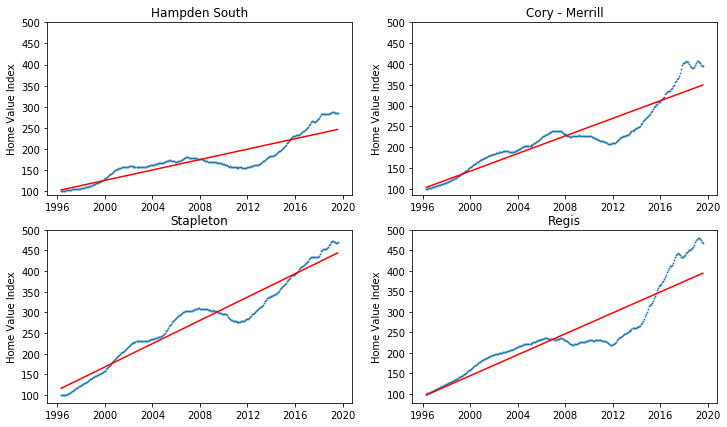

In [29]:
#Plot
plt.subplots(2,2,figsize=(12,7))

plt.subplot(221)
nbh='Hampden South'
plt.scatter(neigh_vi_std['Date'],neigh_vi_std[nbh],s=0.75)
plt.plot(neigh_vi_std['Date'],neigh_vi_std['Year']*neigh_sel[neigh_sel.index==nbh].iloc[0,0]+neigh_sel[neigh_sel.index==nbh].iloc[0,1],\
        color='r')
plt.yticks(np.arange(100,550,step=50))
plt.ylabel('Home Value Index')
plt.title(nbh)


plt.subplot(222)
nbh='Merrill'
plt.scatter(neigh_vi_std['Date'],neigh_vi_std[nbh],s=0.75)
plt.plot(neigh_vi_std['Date'],neigh_vi_std['Year']*neigh_sel[neigh_sel.index==nbh].iloc[0,0]+neigh_sel[neigh_sel.index==nbh].iloc[0,1],\
        color='r')
plt.yticks(np.arange(100,550,step=50))
plt.ylabel('Home Value Index')
plt.title('Cory - Merrill')


plt.subplot(223)
nbh='Stapleton'
plt.scatter(neigh_vi_std['Date'],neigh_vi_std[nbh],s=0.75)
plt.plot(neigh_vi_std['Date'],neigh_vi_std['Year']*neigh_sel[neigh_sel.index==nbh].iloc[0,0]+neigh_sel[neigh_sel.index==nbh].iloc[0,1],\
        color='r')
plt.yticks(np.arange(100,550,step=50))
plt.ylabel('Home Value Index')
plt.title(nbh)

plt.subplot(224)
nbh='Regis'
plt.scatter(neigh_vi_std['Date'],neigh_vi_std[nbh],s=0.75)
plt.plot(neigh_vi_std['Date'],neigh_vi_std['Year']*neigh_sel[neigh_sel.index==nbh].iloc[0,0]+neigh_sel[neigh_sel.index==nbh].iloc[0,1],\
        color='r')
plt.yticks(np.arange(100,550,step=50))
plt.ylabel('Home Value Index')
plt.title(nbh)


plt.show()

<a id='item4'></a>

#### Part IV: Analyze Access to Popular Venues

In [30]:
import requests
from pandas.io.json import json_normalize

In [31]:
# The code was removed by Watson Studio for sharing.

In [32]:
# Define function to retrieve venues around the neighborhoods
def nbhd_venues(nbh,lat,long):
    url='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(foursq_id,foursq_secret,lat,long,version,radius,limit)
    poi=requests.get(url).json()
    items=poi['response']['groups'][0]['items']
    neigh_poi=json_normalize(items)
    neigh_poi=neigh_poi[['venue.name','venue.categories','venue.location.address','venue.location.lat','venue.location.lng','venue.id']]
    neigh_poi.columns=['name','category','address','lat','long','id']
    
    for i in range(len(neigh_poi)):
        neigh_poi.iloc[i,1]=neigh_poi.iloc[i,1][0]['name']
        
    neigh_poi['rating']=np.nan
    neigh_poi['likes']=np.nan
    for i in range(len(neigh_poi)):
        venue_id=neigh_poi.iloc[i,:]['id']
        z=venue_rating(venue_id)
        neigh_poi.iloc[i,-2]=z[0]
        neigh_poi.iloc[i,-1]=z[1]
        
    neigh_poi['Neighborhood']=nbh
    cols=neigh_poi.columns.tolist()
    cols=cols[-1:]+cols[:-1]
    neigh_poi=neigh_poi[cols]
    
    return neigh_poi

In [33]:
# Define function to retrieve ratings
def venue_rating(venue_id):
    url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id,foursq_id,foursq_secret,version)
    venue=requests.get(url).json()
    try:
        rating=venue['response']['venue']['rating']
    except:
        rating=np.nan
    try:
        likes=venue['response']['venue']['likes']['count']
    except:
        likes=np.nan
        
    z=[rating,likes]
    
    return z

In [34]:
# Run reports on selected neighborhoods
neigh_poi=[]
for i in range(len(neigh_coord)):
    nbh=neigh_coord.iloc[i,0]
    lat=neigh_coord.iloc[i,1]
    long=neigh_coord.iloc[i,2]
    neigh_poi.append(nbhd_venues(nbh,lat,long))

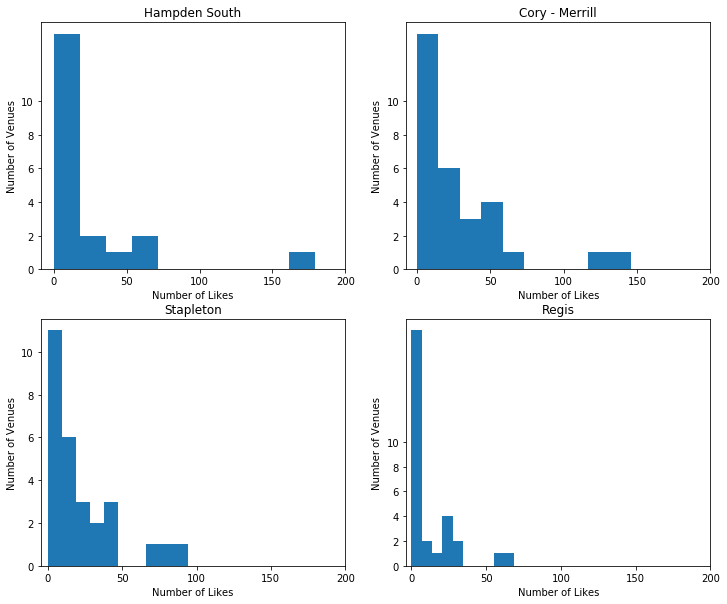

In [35]:
# Histogram charts
plt.subplots(2,2,figsize=(12,10))
for i in range(0,4):
    sbpt='22'+str(i+1)
    plt.subplot(sbpt)
    neigh_poi[i]['likes'].plot(kind='hist')
    plt.yticks(np.arange(0,12,step=2))
    plt.xticks(np.arange(0,250,step=50))
    plt.xlabel('Number of Likes')
    plt.ylabel('Number of Venues')
    plt.title(neigh_poi[i].iloc[0,0])

plt.show()

In [36]:
#Denver coordinates
lat=39.7392
long=-104.9903

In [37]:
# Venue map: colors indicate 'likes' count
venue_map=folium.Map(location=[lat,long],zoom_start=11)

for j in range(len(neigh_poi)):
    for lat, long,likes,label in zip(neigh_poi[j]['lat'],neigh_poi[j]['long'],neigh_poi[j]['likes'],neigh_poi[j]['category']):
        if likes>=50:
            c='red'
        elif likes>=30:
            c='orange'
        elif likes>=10:
            c='yellow'
        else:
            c='#6960EC'
            
        folium.features.CircleMarker(
            [lat,long],
            radius=3,
            color=c,
            popup=label,
            fill=True,
            fill_color=c,
            fill_opacity=1
        ).add_to(venue_map)
        
    
venue_map

In [38]:
# Venue map: colors indicate rating
venue_map=folium.Map(location=[lat,long],zoom_start=11)

for j in range(len(neigh_poi)):
    for lat, long,rating,label in zip(neigh_poi[j]['lat'],neigh_poi[j]['long'],neigh_poi[j]['rating'],neigh_poi[j]['category']):
        if rating>=8:
            c='red'
        elif rating>=7:
            c='orange'
        elif rating>=6:
            c='yellow'
        else:
            c='#6960EC'
            
        folium.features.CircleMarker(
            [lat,long],
            radius=3,
            color=c,
            popup=label,
            fill=True,
            fill_color=c,
            fill_opacity=1
        ).add_to(venue_map)
        
    
venue_map